In [ ]:
import os
import cv2
import keras
import numpy as np
import pandas as pd
import random as rn
from PIL import Image
from tqdm import tqdm
import tensorflow as tf
import matplotlib.pyplot as plt
from IPython.display import SVG
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import gc
from keras.callbacks import EarlyStopping, ModelCheckpoint

from tensorflow.python.keras import backend as K
from tensorflow.keras.optimizers import Adam
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.callbacks import ReduceLROnPlateau
from tensorflow.python.keras.utils.vis_utils import model_to_dot
from tensorflow.python.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.resnet50 import ResNet50,preprocess_input
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.applications import DenseNet201

from tensorflow.keras import  layers, models



from sklearn.model_selection import train_test_split,KFold, cross_val_score, GridSearchCV
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator,load_img, img_to_array, save_img
from tensorflow.python.keras.layers import Dense, Flatten,MaxPooling2D, GlobalAveragePooling2D,BatchNormalization,Dropout,Conv2D,MaxPool2D,Activation
from sklearn.utils import shuffle
from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix
from keras.utils.vis_utils import plot_model

In [ ]:
from glob import glob
imagePatches = glob('/content/drive/MyDrive/Xrays/chest_xray/**/**/*.jpeg', recursive=False)
print(len(imagePatches))

5856


In [ ]:
import cv2
import fnmatch
pattern_normal = '*NORMAL*'
pattern_bacteria = '*_bacteria_*'
pattern_virus = '*_virus_*'

normal = fnmatch.filter(imagePatches, pattern_normal)
bacteria = fnmatch.filter(imagePatches, pattern_bacteria)
virus = fnmatch.filter(imagePatches, pattern_virus)
x = []
y = []
for img in imagePatches:
    full_size_image = cv2.imread(img)
    im = cv2.resize(full_size_image, (224, 224), interpolation=cv2.INTER_CUBIC)
    im = im.astype(np.float32)/255.
    x.append(im)
    if img in normal:
        y.append(0)
    elif img in bacteria:
        y.append(1)
    elif img in virus:
        y.append(1)
    else:
        #break
        print('no class')
x = np.array(x)
y = np.array(y)

In [ ]:
pip install np_utils

     |████████████████████████████████| 61 kB 3.0 MB/s 
  Created wheel for np-utils: filename=np_utils-0.5.12.1-py3-none-any.whl size=57131 sha256=612aad8bffacb4223c38d4cb02d4c4471a7be46cbd6edd5958d3f8fc649c1ecf
  Stored in directory: /root/.cache/pip/wheels/8c/4e/ef/095c24693723c329f4cdc1079861cdbb2487d4b41b2496a4e7
Successfully built np-utils


In [ ]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size = 0.2, random_state = 101, stratify=y)
y_train = to_categorical(y_train, num_classes = 2)
y_valid = to_categorical(y_valid, num_classes = 2)
del x,y

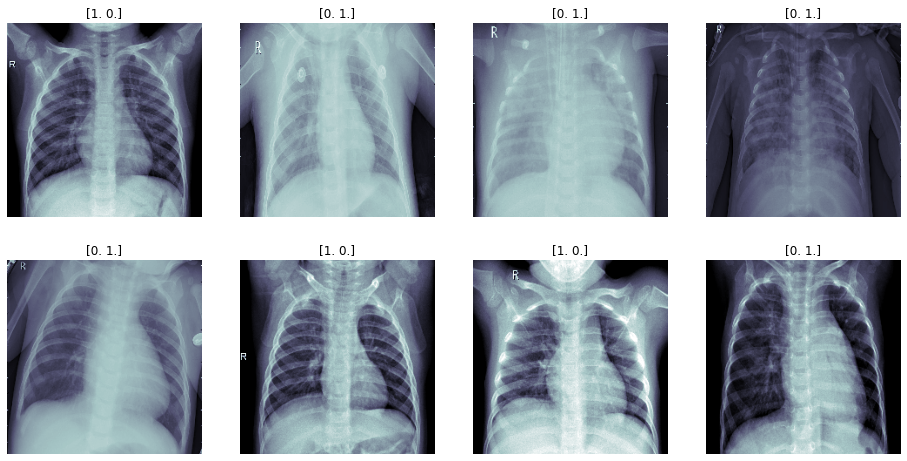

In [ ]:
import matplotlib.pyplot as plt
fig, m_axs = plt.subplots(2, 4, figsize = (16, 8))
for (c_x, c_y, c_ax) in zip(x_valid, y_valid, m_axs.flatten()):
    c_ax.imshow(c_x[:,:,0], cmap = 'bone')
    c_ax.set_title(str(c_y))
    c_ax.axis('off')

In [ ]:
# config the session 
import tensorflow as tf

# Set the seed for hash based operations in python
os.environ['PYTHONHASHSEED'] = '0'

# Set the numpy seed
np.random.seed(111)

# Set the random seed in tensorflow at graph level
tf.random.set_seed(111)
from random import seed
seed(111)

In [ ]:
from keras import layers, Model, backend
channel_axis = -1# if backend.image_data_format() == 'channels_first' else -1
def model():
    img_input = layers.Input(shape = (224, 224, 3))
    x = layers.Conv2D(32, (3,3),
                      padding = 'same', use_bias = False,
                      name = 'block1_conv1')(img_input)
    x = layers.BatchNormalization(axis = channel_axis, name = 'block1_bn1')(x)
    x = layers.Activation('relu', name = 'block1_act1')(x)
    x = layers.Conv2D(32, (3,3),
                      padding = 'same', use_bias = False,
                      name = 'block1_conv2')(x)
    x = layers.BatchNormalization(axis = channel_axis, name = 'block1_bn2')(x)
    x = layers.Activation('relu', name = 'block1_act2')(x)
    x = layers.MaxPooling2D((2, 2),
                            strides=(2, 2),
                            padding='same',
                            name='block1_pool')(x)

    # block 2
    x = layers.Conv2D(64, (3,3),
                      padding = 'same', use_bias = False,
                      name = 'block2_conv1')(x)
    x = layers.BatchNormalization(axis = channel_axis, name = 'block2_bn1')(x)
    x = layers.Activation('relu', name = 'block2_act1')(x)
    x = layers.Conv2D(64, (3,3),
                      padding = 'same', use_bias = False,
                      name = 'block2_conv2')(x)
    x = layers.BatchNormalization(axis = channel_axis, name = 'block2_bn2')(x)
    x = layers.Activation('relu', name = 'block2_act2')(x)
    x = layers.MaxPooling2D((2, 2),
                            strides=(2, 2),
                            padding='same',
                            name='block2_pool')(x)

    # block 3
    x = layers.Conv2D(128, (3,3),
                      padding = 'same', use_bias = False,
                      name = 'block3_conv1')(x)
    x = layers.BatchNormalization(axis = channel_axis, name = 'block3_bn1')(x)
    x = layers.Activation('relu', name = 'block3_act1')(x)
    x = layers.Conv2D(128, (3,3),
                      padding = 'same', use_bias = False,
                      name = 'block3_conv2')(x)
    x = layers.BatchNormalization(axis = channel_axis, name = 'block3_bn2')(x)
    x = layers.Activation('relu', name = 'block311_act2')(x)
    x = layers.MaxPooling2D((3, 3),
                            strides=(3, 3),
                            padding='same',
                            name='block3_pool')(x)

    x = layers.Conv2D(256, (3,3),
                      padding = 'same', use_bias = False,
                      name = 'block31_conv1')(x)
    x = layers.BatchNormalization(axis = channel_axis, name = 'block31_bn1')(x)
    x = layers.Activation('relu', name = 'block31_act1')(x)
    x = layers.Conv2D(128, (3,3),
                      padding = 'same', use_bias = False,
                      name = 'block31_conv2')(x)
    x = layers.BatchNormalization(axis = channel_axis, name = 'block31_bn2')(x)
    x = layers.Activation('relu', name = 'block31_act2')(x)
    x = layers.MaxPooling2D((3, 3),
                            strides=(3, 3),
                            padding='same',
                            name='block31_pool')(x)

  # block 4
    x = layers.Conv2D(1024, (3,3),
                      padding = 'same', use_bias = False,
                      name = 'block41_conv1')(x)
    x = layers.BatchNormalization(axis = channel_axis, name = 'block41_bn1')(x)
    x = layers.Activation('relu', name = 'block41_act1')(x)
    x = layers.Conv2D(512, (3,3),
                      padding = 'same', use_bias = False,
                      name = 'block41_conv2')(x)
    x = layers.Dropout(0.4, name = 'block4_dropout')(x)
    x = layers.BatchNormalization(axis = channel_axis, name = 'block4_bn2')(x)
    x = layers.Activation('relu', name = 'block4_act2')(x)
    x = layers.MaxPooling2D((3, 3),
                            strides=(3, 3),
                            padding='same',
                            name='block4_pool')(x)
    x = layers.Flatten(name='flatten')(x)
    x = layers.Dense(512, activation='relu', name='fc1')(x)
    x = layers.Dense(1024, activation='relu', name='fc11')(x)
    x = layers.Dense(512, activation='relu', name='fc3')(x)
    x = layers.Dense(512, activation='relu', name='fc4')(x)
    x = layers.Dense(256, activation='relu', name='fc5')(x)
    x = layers.Dense(64, activation='relu', name='fc6')(x)
    x = layers.Dense(2, activation='softmax', name='predictions')(x)
    model = Model(inputs=img_input, outputs=x, name = 'own_build_model')
    return model
model = model()
model.summary()

Model: "own_build_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 32)      864       
_________________________________________________________________
block1_bn1 (BatchNormalizati (None, 224, 224, 32)      128       
_________________________________________________________________
block1_act1 (Activation)     (None, 224, 224, 32)      0         
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 32)      9216      
_________________________________________________________________
block1_bn2 (BatchNormalizati (None, 224, 224, 32)      128       
_________________________________________________________________
block1_act2 (Activation)     (None, 224, 224, 32)  

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
LEARN_RATE = 1e-4
from tensorflow.keras.optimizers import Adam
model.compile(optimizer = Adam(lr = LEARN_RATE), loss = 'categorical_crossentropy',
                           metrics = ['categorical_accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, EarlyStopping, ReduceLROnPlateau
weight_path="{}.best_only.hdf5".format('save')

checkpoint = ModelCheckpoint(weight_path, monitor='val_loss', verbose=1, 
                             save_best_only=True, mode='min', save_weights_only = True)

reduceLROnPlat = ReduceLROnPlateau(monitor='val_loss', factor=0.8, 
                              patience=5, verbose=1, mode='auto', 
                              epsilon=0.0001, cooldown=5, min_lr=0.0001)
early = EarlyStopping(monitor="val_loss", 
                      mode="min", 
                      patience=40) # probably needs to be more patient, but kaggle time is limited
callbacks_list = [checkpoint, early,reduceLROnPlat]

In [ ]:
#@title Default title text
history = model.fit(x_train,y_train,batch_size = 16, 
                    epochs = 30, verbose=1,  validation_split=0.2, callbacks=callbacks_list)

NameError: ignored

In [ ]:
test_loss, test_score = model.evaluate(x_valid, y_valid, batch_size=24)
print("Loss on test set: ", test_loss)
print("Accuracy on test set: ", test_score)
#2304 seconds 50 epochs
#192 ms/step = average ms/step

NameError: ignored

In [ ]:
pred_y = model.predict(x_valid, callbacks=callbacks_list)

NameError: ignored

In [ ]:
# Original labels
orig_test_labels = np.argmax(y_valid, axis=-1)

print(orig_test_labels.shape)
print(pred_y.shape)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(np.argmax(y_valid, axis = 1),np.argmax(pred_y, axis = 1)))

In [ ]:
# Calculate Precision and Recall
tn, fp, fn, tp = cm.ravel()

precision = tp/(tp+fp)
recall = tp/(tp+fn)

print("Recall of the model is {:.2f}".format(recall))
print("Precision of the model is {:.2f}".format(precision))

NameError: ignored

In [ ]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
# Get the confusion matrix
cm  = confusion_matrix(np.argmax(y_valid, axis = 1), np.argmax(pred_y, axis = 1))
plt.figure()
plot_confusion_matrix(cm,figsize=(12,8), hide_ticks=True,cmap=plt.cm.Blues)
plt.xticks(range(2), ['Normal', 'Pneumonia'], fontsize=16)
plt.yticks(range(2), ['Normal', 'Pneumonia'], fontsize=16)
plt.show()

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
fpr, tpr, _ = roc_curve(np.argmax(y_valid,-1)==0, pred_y[:,0])
fig, ax1 = plt.subplots(1,1, figsize = (5, 5), dpi = 250)
ax1.plot(fpr, tpr, 'b.-', label = 'Own-Model (AUC:%2.2f)' % roc_auc_score(np.argmax(y_valid,-1)==0, pred_y[:,0]))
ax1.plot(fpr, fpr, 'k-', label = 'Random Guessing')
ax1.legend(loc = 4)
ax1.set_xlabel('False Positive Rate')
ax1.set_ylabel('True Positive Rate');
ax1.set_title('Pneumonia Classification ROC Curve')
fig.savefig('roc_valid.pdf')